<a href="https://colab.research.google.com/github/Farivini/Apache_spark/blob/main/Apache_spark_atp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Autor: Vinicius farineli freire.*

*Materia: Frameworks de Big data*

*Professor Galbas Milleo Filho*

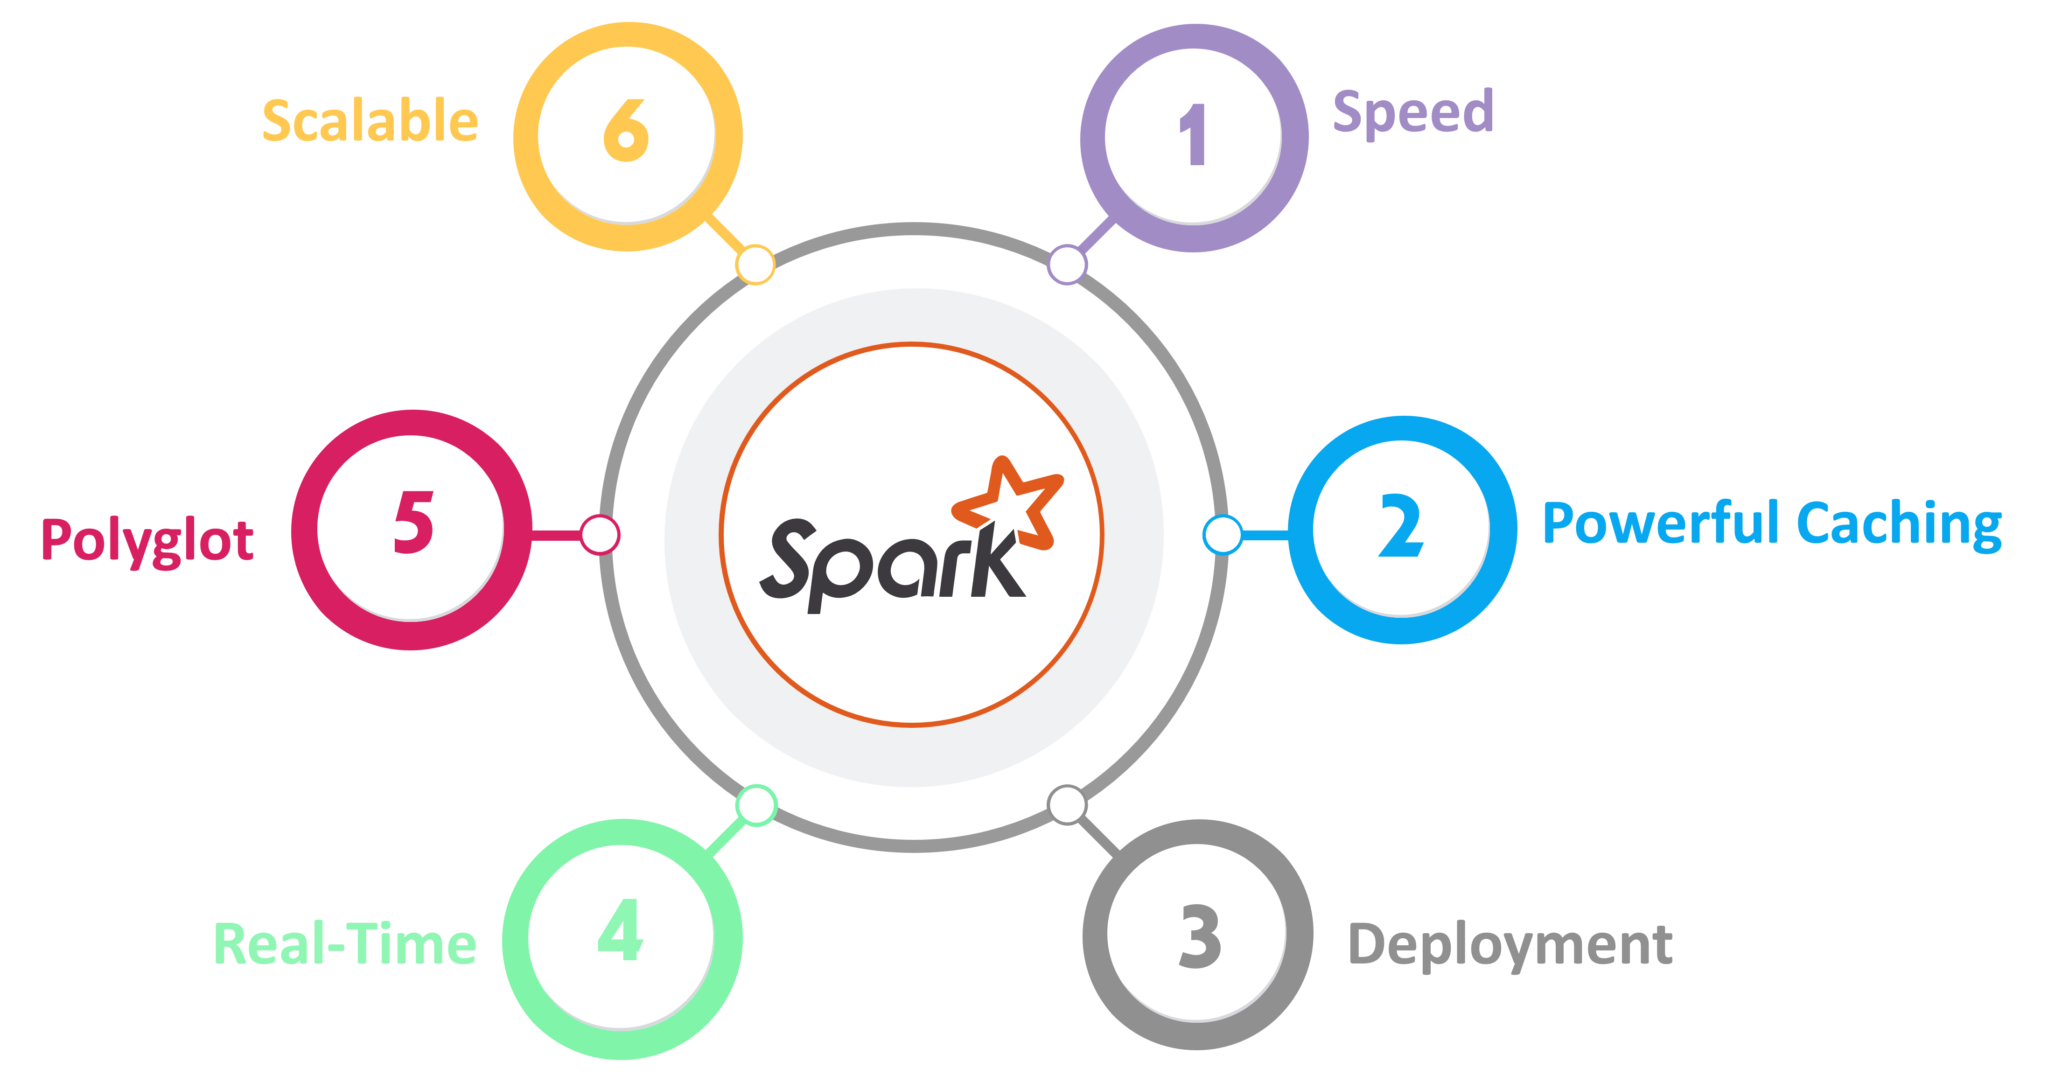

# *Introdução:*

### Neste artigo técnico veremos como basicamente funciona e como se comporta Apache Spark.
### Teremos um Dataset contendo milhões de linhas, e com isso vamos precisar realizar algumas consultas.
### Mostraremos os dados ,mas, alem disso dificuldades ,tempo de resposta, importancia das consultas para realizar analises e codigos usados para fazer tais consultas.
### Em relação ao quesito de generalização do Spark, ele foi projetado para cobrir uma grande variedade de carga de trabalho, o que inclui aplicações com processamento em lotes, algoritmos interativos, consultas interativas e streaming, tornando mais simples e barato combinar diferentes tipos de processamento em um único mecanismo, o que geralmente é necessário nas estruturas de análise de dados em produção, sem precisar da oneração de gerenciar e manter ferramentas separadas. Ainda assim, ele se integra facilmente com outras ferramentas de big data quando necessário. 

###  Hadoop e o Spark são os principais frameworks para análise de big data. Para que a comparação entre eles seja justa, é necessário comparar o Spark com o Hadoop MapReduce, pois são os responsáveis pelo processamento dos dados. A principal diferença entre eles se dá no fato de o Spark processar os dados em memória, enquanto no Hadoop MapReduce os dados precisam ser lidos e gravados em disco, o que pode gerar uma diferença no tempo de processamento, em que o Spark pode ser dezenas de vezes mais rápido. Apesar disso, o Hadoop MapReduce pode trabalhar com conjuntos de dados consideravelmente maiores do que o Spark

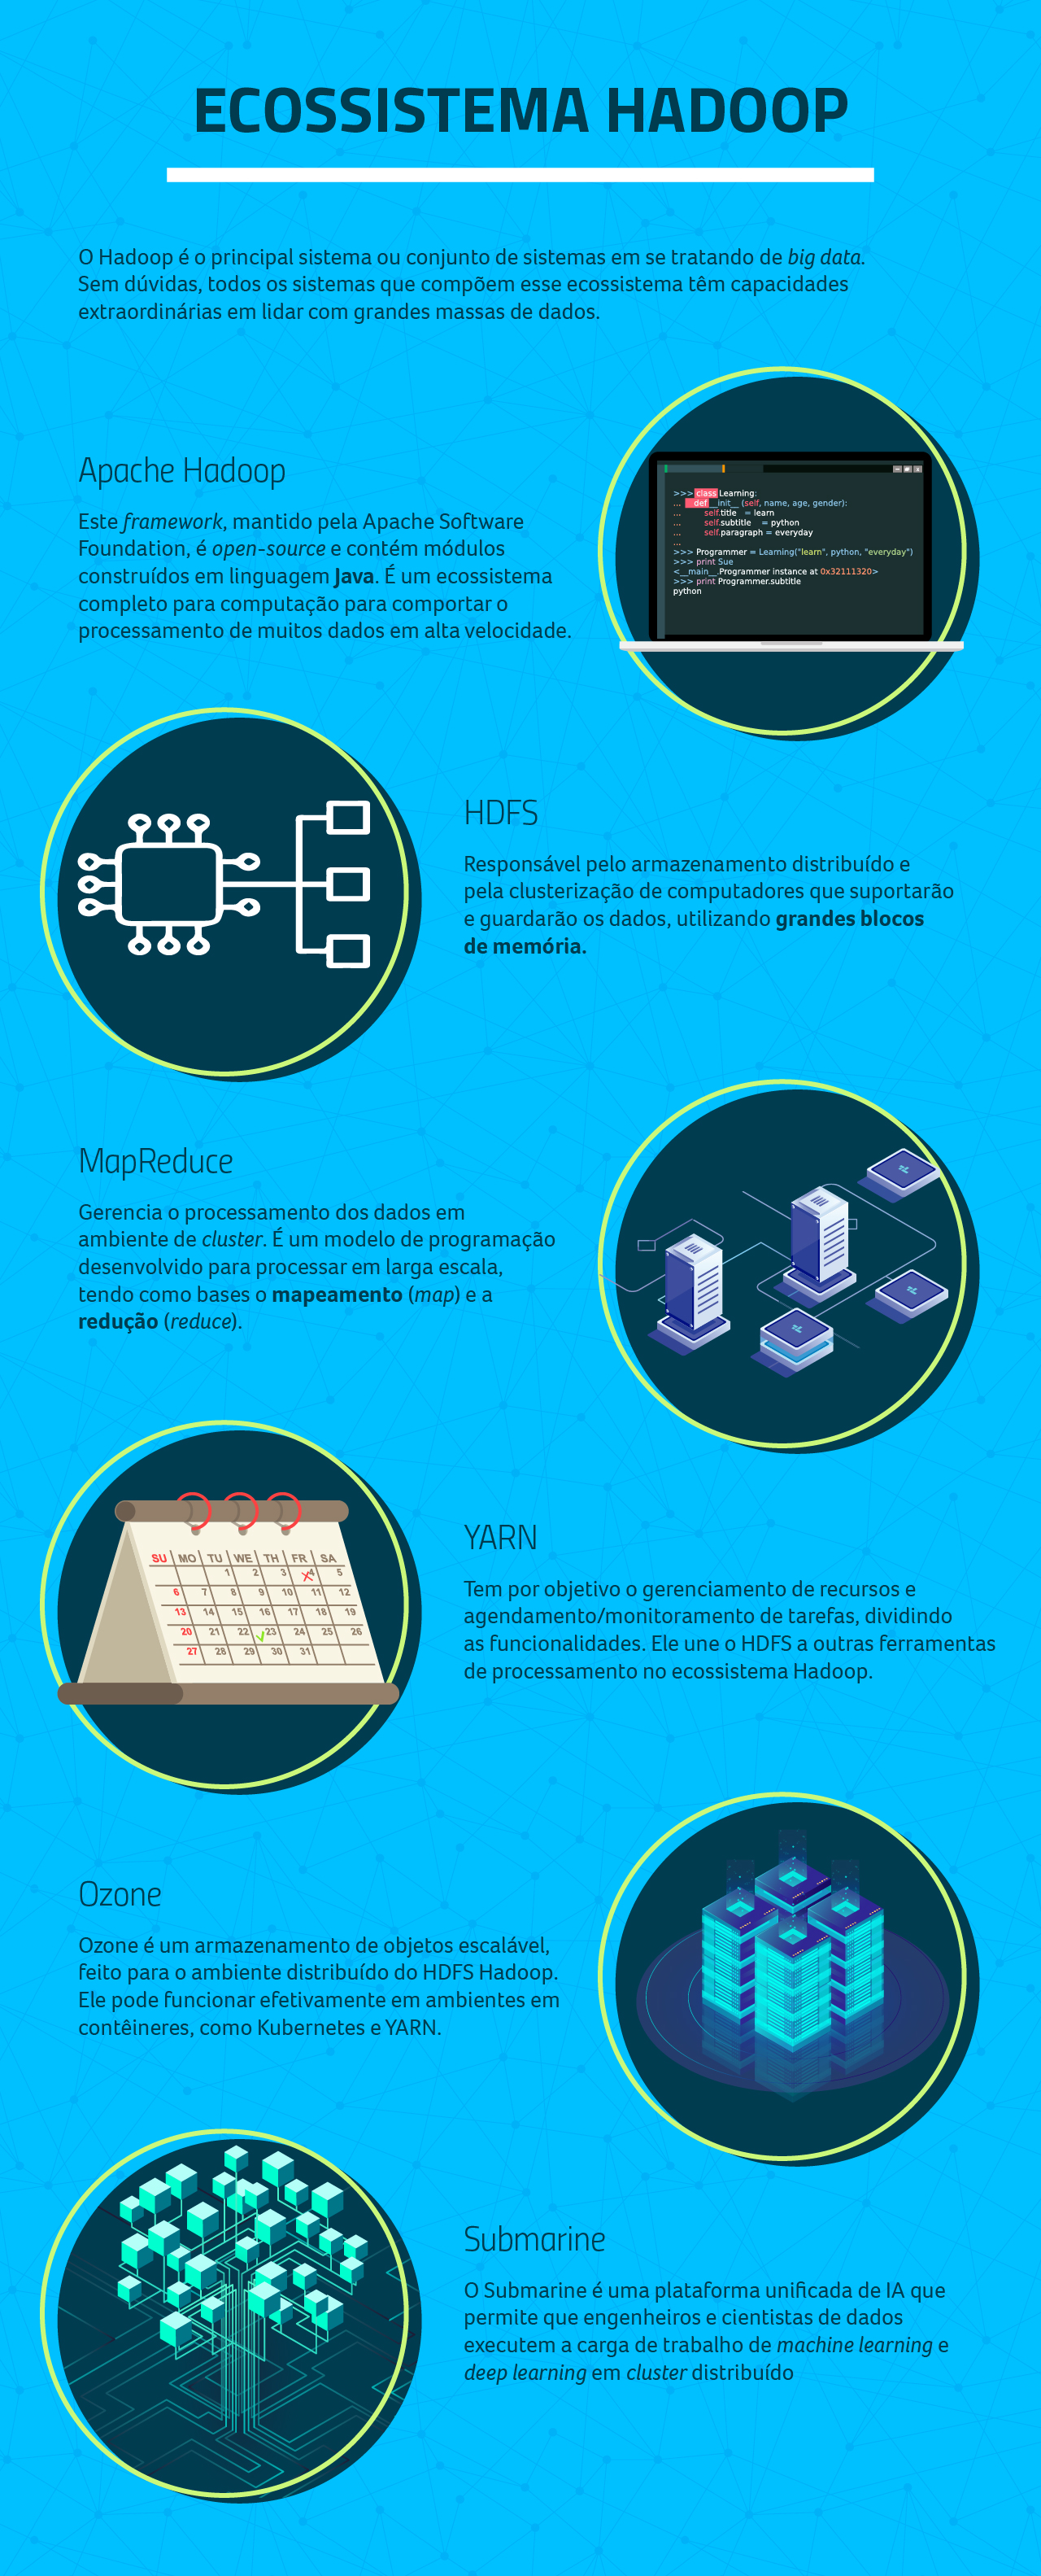

# Objetivos:

*   Verificar uso do Apache spark.
*   Comportamento e tempo de resposta das consultas.
*   Mostrar e verificar dados.
*   Listar dificuldades encontradas.










#Mais sobre Apache Spark:

### O Spark SQL, é parte integrante do framework de Big Data Apache Spark, utilizado para processamento de dados estruturados, que permite executar consultas SQL no conjunto de dados do Spark. É possível realizar tarefas ETL sobre os dados em diferentes formatos, como por exemplo JSON, Parquet, banco de dados e com isto, executar consultas ad-hoc.

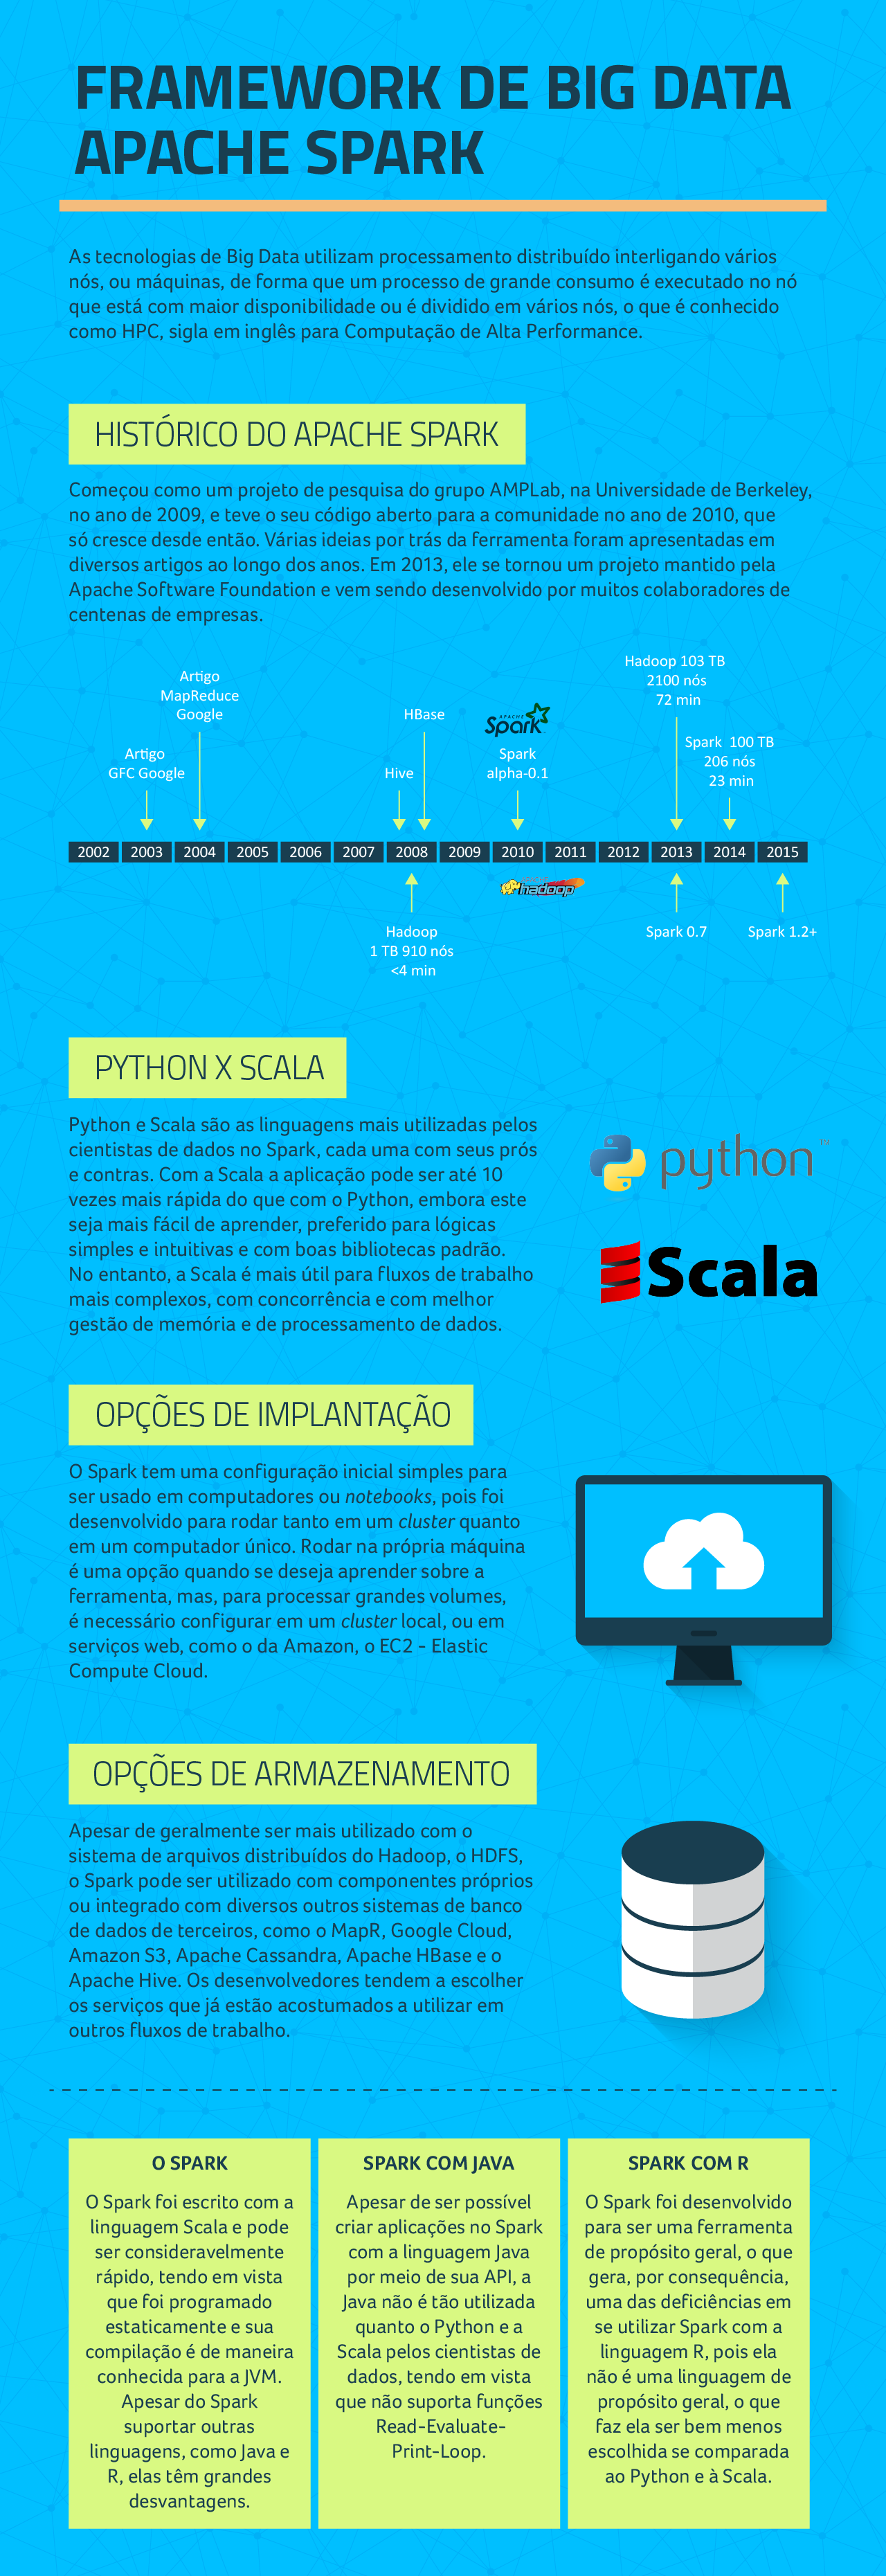

# Representação de dados 

*   Quantidade de crimes por anos
*   Quantidade de crimes do tipo NARCOTICO
*   Mês com maior media de crimes
*   Mês com maior ocorrecia
*   Dia do ano com maior ocorrencia de crime
*   Crimes do tipo DECEPTIVE PRACTICE







# Abaixo temos nosso Dados

### Temos aqui uma parte dos nossos dados.
Modificamos e incluimos os cabeçalho para poder entender melhor.

Assim conseguimos explorar melhor, tendo uma base de como esta distribuido e com quais dados vamos trabalhar. 



```
+---+---+----+--------------------+--------------------+
|dia|mes| ano|              regiao|               crime|
+---+---+----+--------------------+--------------------+
| 18|  3|2015|     047XX W OHIO ST|             BATTERY|
| 18|  3|2015|066XX S MARSHFIEL...|       OTHER OFFENSE|
| 18|  3|2015|044XX S LAKE PARK...|             BATTERY|
| 18|  3|2015|051XX S MICHIGAN AVE|             BATTERY|
| 18|  3|2015|    047XX W ADAMS ST|             ROBBERY|
| 18|  3|2015| 049XX S DREXEL BLVD|             BATTERY|
| 18|  3|2015|   070XX S MORGAN ST|             BATTERY|
| 18|  3|2015| 042XX S PRAIRIE AVE|             BATTERY|
| 18|  3|2015| 036XX S WOLCOTT AVE|           NARCOTICS|
| 18|  3|2015| 097XX S PRAIRIE AVE|             BATTERY|
| 18|  3|2015|130XX S DR MARTIN...|     CRIMINAL DAMAGE|
| 15|  3|2015|078XX S VINCENNES...|       OTHER OFFENSE|
| 18|  3|2015|086XX S EXCHANGE AVE|   WEAPONS VIOLATION|
| 18|  3|2015| 014XX S ASHLAND AVE|             BATTERY|
| 18|  3|2015| 051XX W CHICAGO AVE|               THEFT|
| 18|  3|2015|077XX S KINGSTON AVE|            BURGLARY|
| 18|  3|2015|   024XX W NORTH AVE| MOTOR VEHICLE THEFT|
| 18|  3|2015| 069XX S LOOMIS BLVD|               THEFT|
| 18|  3|2015|105XX S LAFAYETTE...|PUBLIC PEACE VIOL...|
| 18|  3|2015| 087XX S KIMBARK AVE|               THEFT|
+---+---+----+--------------------+--------------------+
```



## *Nesse momento solicitamos a quantidade de crimes por ano.*

### *Com querys SQL conseguimos retornar esses dados*



```
Dataset<Row> CrimesAno = spark.sql("SELECT "
                + "ano, COUNT(*) as ocorrencias "
                + "FROM ocorrencias "
                + "GROUP BY ano "
                + "ORDER BY ano");
        
        CrimesAno.show();
```





```
+----+-----------+
| ano|quantidade |
+----+-----------+
|2001|     965880|
|2002|     944160|
|2003|     944292|
|2004|     934472|
|2005|     900024|
|2006|     891146|
|2007|     871402|
|2008|     840362|
|2009|     772350|
|2010|     739988|
|2011|     702608|
|2012|     670854|
|2013|     612698|
|2014|     547438|
|2015|     515922|
|2016|     534500|
|2017|     530138|
|2018|     238950|
+----+-----------+
```



## Colocando esse dados em duas variaveis para poder fazer essa visualização.

In [ ]:
eixo_x = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
valores = [965880.00, 944160.00, 944292.00, 934472.00, 900024.00, 891146.00, 871402.00, 840362.00, 772350.00, 739988.00, 702608.00, 670854.00, 612698.00, 547438.00, 515922.00, 534500.00, 530138.00, 238950.00]


# Visualizando:
### No grafico conseguimos ver que este numeros vem diminuindo aos longos dos anos , dados e visualização desta maneira facilitam para poder dizer aos responsaveis que abordagem tomar ou se a abordagem atual esta funcionando.

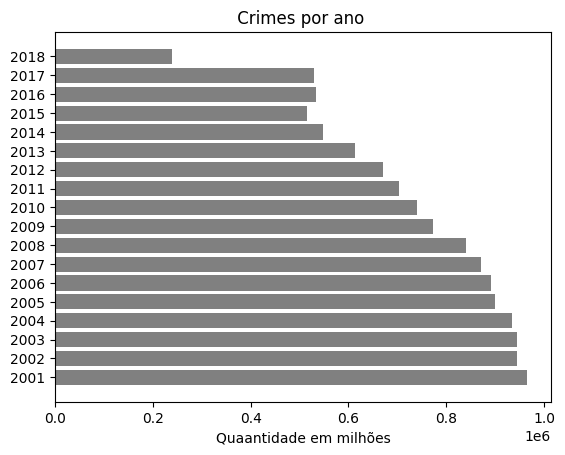

In [ ]:
plt.barh(eixo_x, valores, color='grey')

plt.title(' Crimes por ano  ')

plt.xlabel('Quaantidade em milhões')

plt.show()

# ***Quantidade de Narcoticos por ano:***

### Em seguida fazemos uma consulta para identificar quantos crimes do tipo **NARCOTICOS** teve por ano..

### Para a consulta utilizamos Spark-sql para facilitar com as querys e retornar o que desejamos.

Dataset<Row> Narc = spark.sql("SELECT "
+ "ano, COUNT(*) as ocorrencias "

                + "FROM ocorrencias "
                + "WHERE crime = 'NARCOTICS'"
                + "GROUP BY ano "
                + "ORDER BY ano");
        Narc.show();

## Com consulta SQL temos o tempo de retorno na casa do 14s.



```
BUILD SUCCESS
------------------------------------------------------------------------
Total time:  13.558 s
Finished at: 2020-11-11T00:02:02-02:00
------------------------------------------------------------------------
```





```
+----+----------------------+
| ano|Crimes tipo Narcoticos|
+----+----------------------+
|2001|     100644|
|2002|      99704|
|2003|     107542|
|2004|     113764|
|2005|     111904|
|2006|     110684|
|2007|     108824|
|2008|      90144|
|2009|      84328|
|2010|      86780|
|2011|      77158|
|2012|      70942|
|2013|      68212|
|2014|      57812|
|2015|      43216|
|2016|      26514|
|2017|      22950|
|2018|      11576|
+----+-----------+
```



# Via JavaRDD temos a seguinte consulta.

### Abaixo conseguimos ver o tempo de resposta com a função Lambda e RDD.
É visto que o tempo de resposta e muito menor.
Mesmo sendo uma diferença de aproximadamente 7s , se estivermos falando de varios usuarios ao mesmo tempo e um serviço que precise de velocidade e disponibilidade , 1 segundo ja e muito tempo.



```
------------------------------------------------------------------------
BUILD SUCCESS
------------------------------------------------------------------------
Total time:  7.826 s
Finished at: 2020-11-10T23:58:47-02:00
------------------------------------------------------------------------
```



## Exemplo da função aplicada abaixo.



```
        //VARIAVEL CRIADA COM FUNÇÃO LAMBDA PARA FILTRAR OS TIPOS NARCOTICS
        
        JavaRDD <String> tipoNarco = arquivo.filter(s-> {
             String[] campos_2 = s.split(";");
             String tipo = campos_2[4];
             return tipo.equalsIgnoreCase("NARCOTICS");
         
         });
             
        
        //CARREGANDO E APLICANDO FUNÇÃO LAMBDA PARA CAMPO 2 QUE E O DO ANO
        
        JavaRDD<String> anoRDD = tipoNarco.map(s -> 
        {   
            String[] campos_2 = s.split(";") ;
            return campos_2[2];
            
        }); 

         mostranarcoticos(anoRDD.countByValue());
        }      
          
            
      public static void mostranarcoticos (Map<String, Long> genericRDD){
            genericRDD.entrySet().forEach((entrada) -> {
           System.out.println(entrada.getKey() + " = " +entrada.getValue());
           });
       }
}
```



## Dados que retornam:



```
2014 = 57812
2003 = 107542
2013 = 68212
2002 = 99704
2018 = 11576
2007 = 108824
2004 = 113764
2015 = 43216
2011 = 77158
2001 = 100644
2008 = 90144
2012 = 70942
2005 = 111904
2010 = 86780
2009 = 84328
2016 = 26514
2017 = 22950
2006 = 110684
```



# *Podemos verificar tambem a fim de comparar qual tipo de crime ocorreu mais,separado pelos anos.*

### Vamos pegar crimes do tipo agressão



```
+----+-----------+
| ano|  Agressão |
+----+-----------+
|2001|     186118|
|2002|     183680|
|2003|     175722|
|2004|     173948|
|2005|     167332|
|2006|     161142|
|2007|     159122|
|2008|     150974|
|2009|     135600|
|2010|     130790|
|2011|     120896|
|2012|     118252|
|2013|     107988|
|2014|      98830|
|2015|      97668|
|2016|     100500|
|2017|      98292|
|2018|      45904|
+----+-----------+
```



## Com os dados conseguimos comparar a diferença entre a quantidade de crimes cometidos dos dois tipos.

### Tendo todos esse dados filtrados consegue-se tomar decisões e agir conforme necessidade mostrada nos numeros.

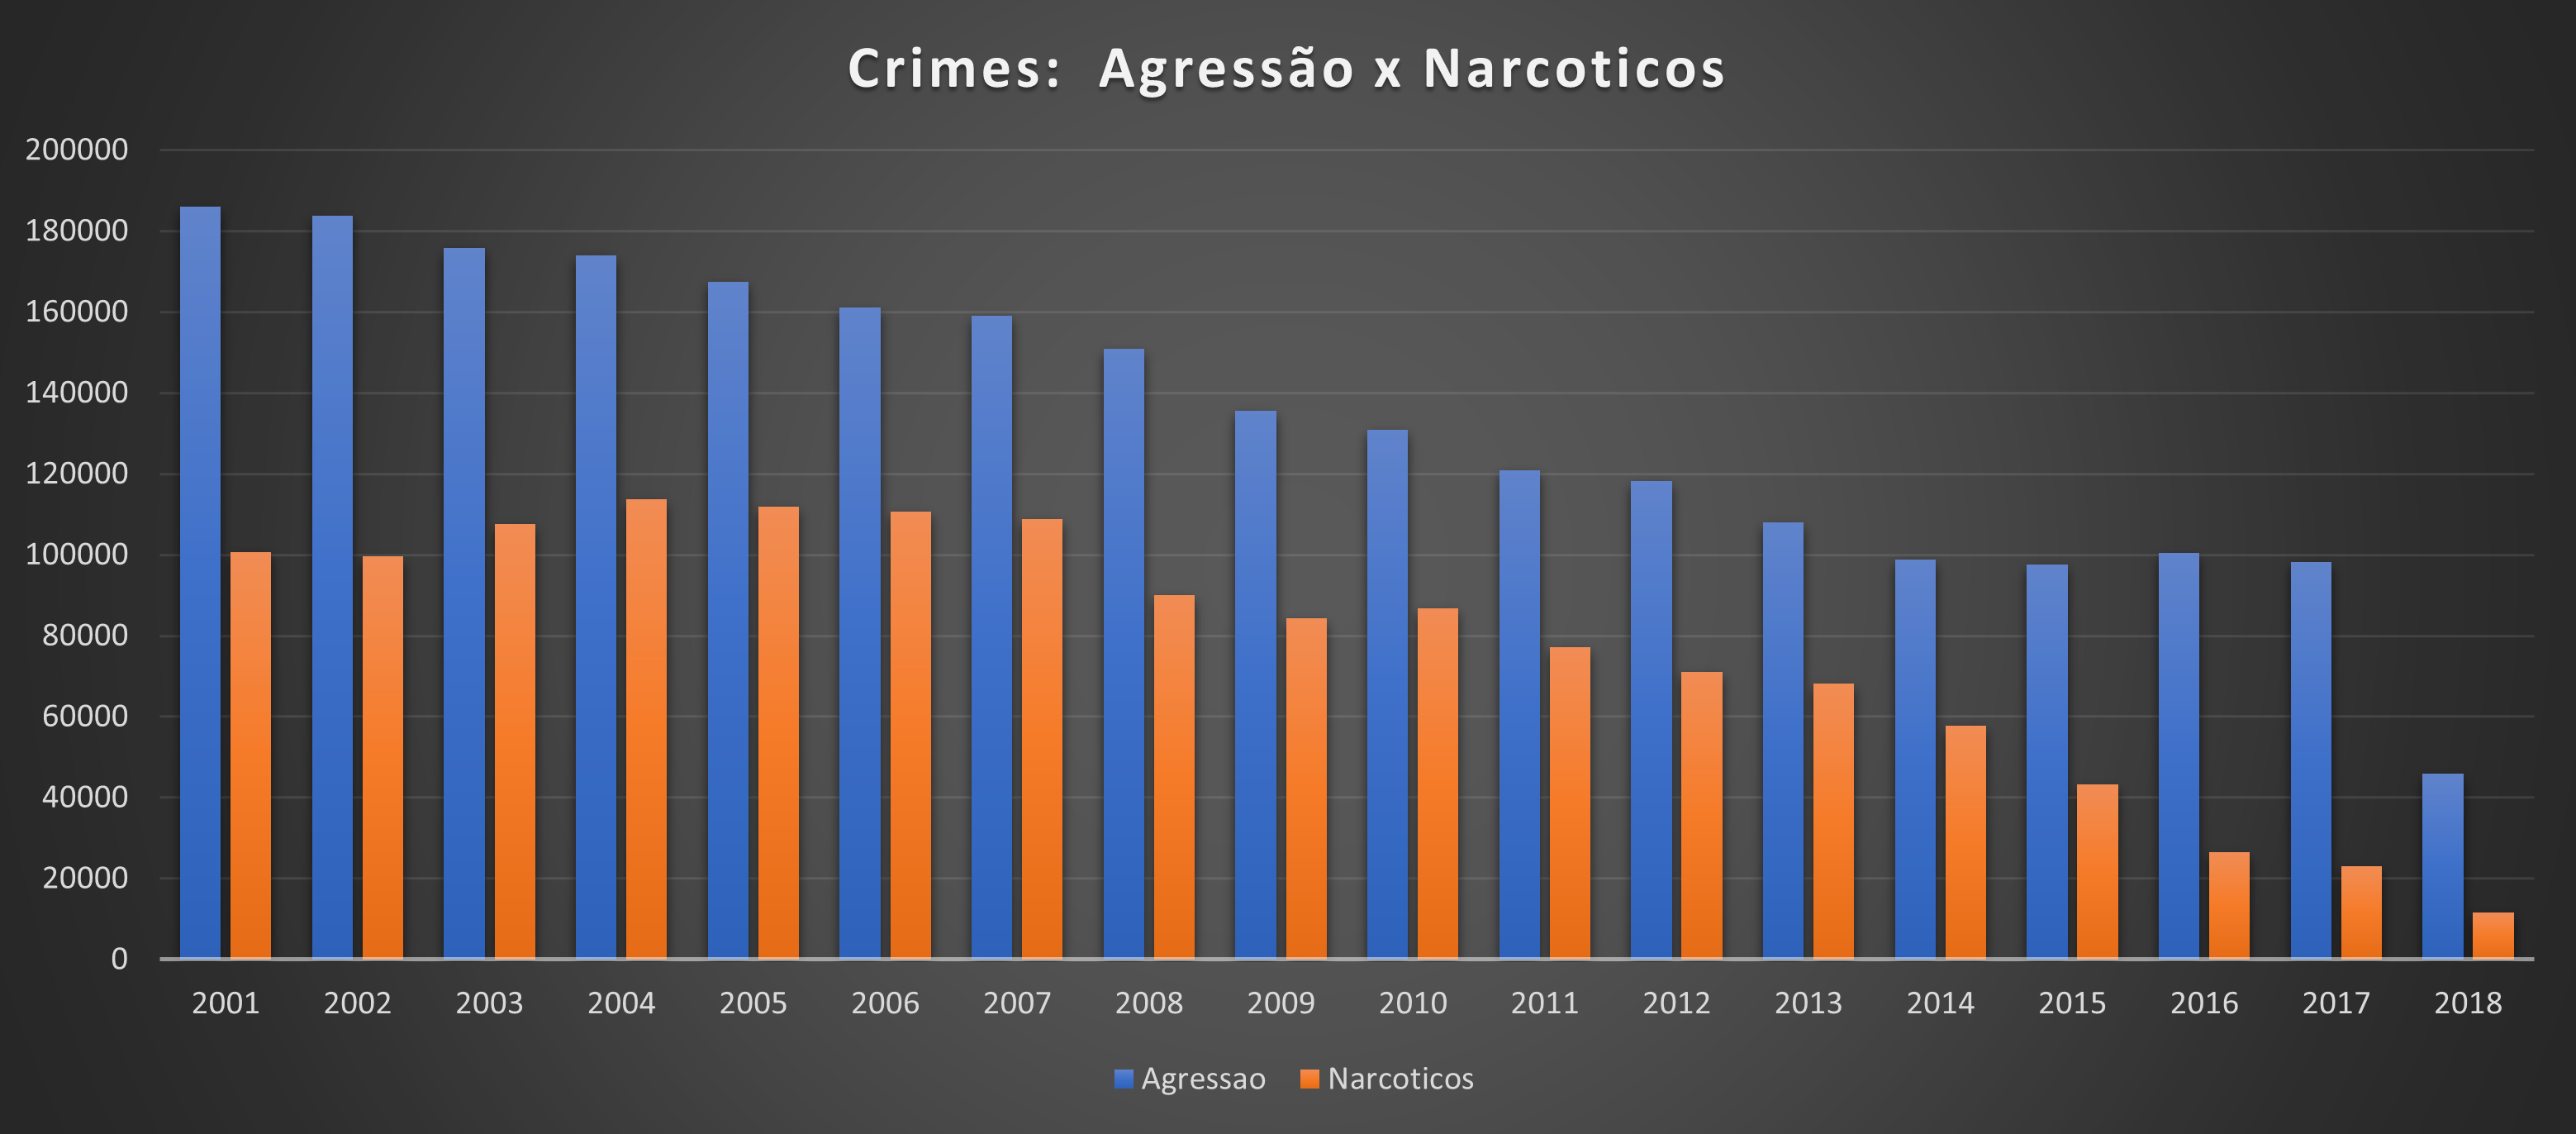

# Conseguimos ver a contagem de crimes por mês .

## Certamente uma consulta dessa consegue mostrar em que mes deve se instensificar o policiamento e qual deve ser a medida a tomar.



```
JavaRDD <String> mes = arquivo.map(s->
              {
                 String[] campos = s.split(";");
                 return campos[1];
             
             });
             mes.sortBy(f ->f, true, mes.getNumPartitions());
             System.out.println(mes.countByValue());

            // Consulta retorna esses dados
            
             12=956220, 
             08=1188690, 
             09=1116710, 
             11=1015940,
             05=1197694, 
             04=1107858, 
             10=1128926, 
             03=1105354, 
             06=1177610, 
             02=918188, 
             07=1202032, 
             01=1041962

Com esse tempo de retorno pra essa consulta

-----------------------------------------------------------------------
BUILD SUCCESS
------------------------------------------------------------------------
Total time:  10.175 s
Finished at: 2020-11-24T22:51:41-02:00
------------------------------------------------------------------------
```



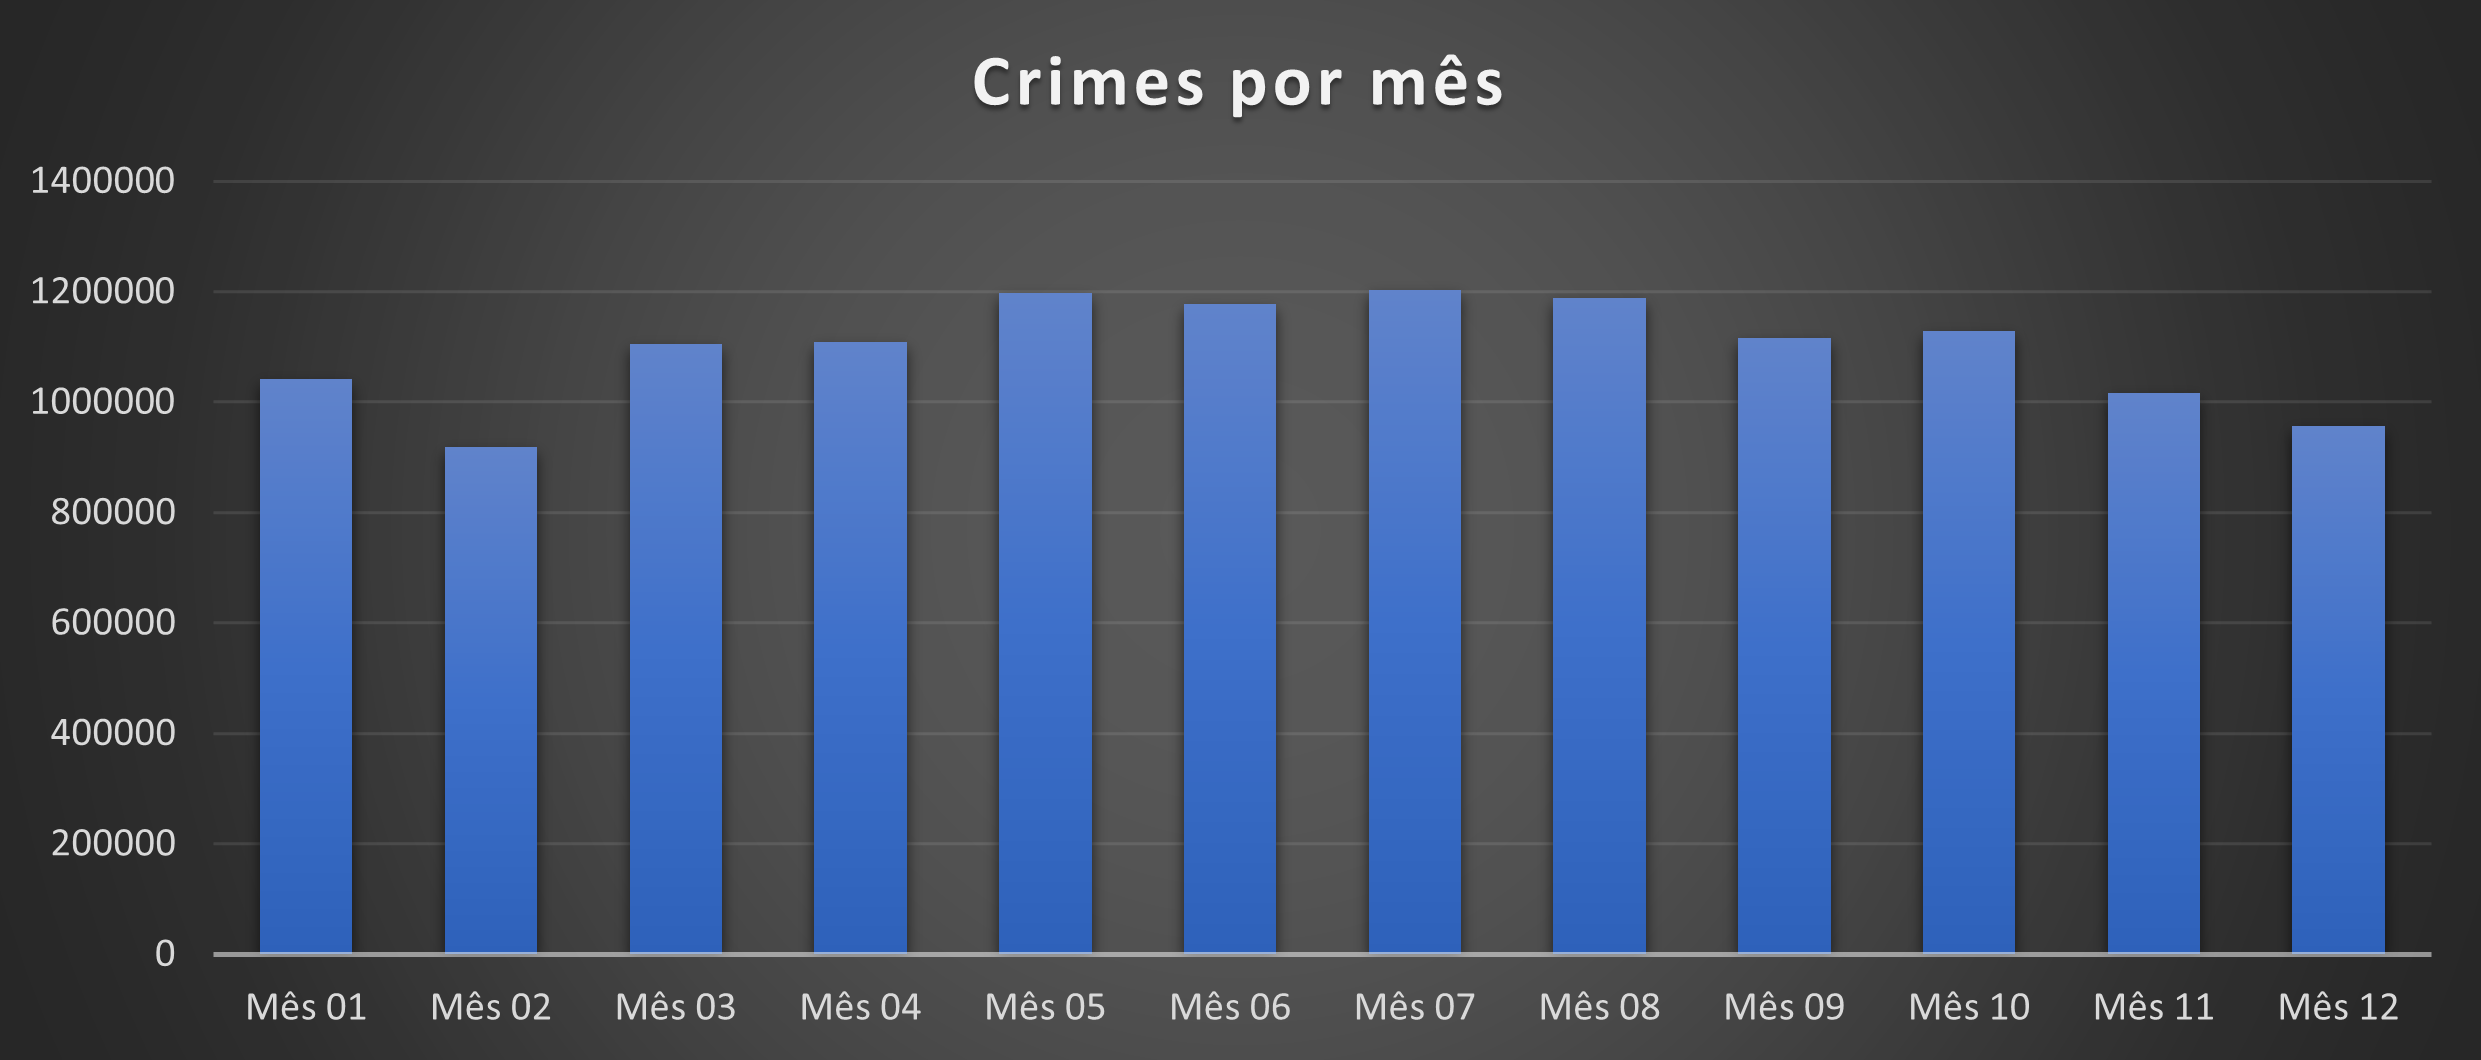

# Conclusão:

### Neste artigo, apresentamos uma abordagem para realizar análise de crime usando apache spark e análise de padrão de crime. Realizamos este experimento com os dados de crime obtidos do sistema PUCPR, e realizamos com sucesso uma análise de crime.  O Apache Spark fornece bibliotecas de terceiros para análises e previsões de séries temporais. Portanto, tentaremos utilizar essas bibliotecas para nossos estudos futuros relacionados à análise de crime.
### Com isso conseguimos ver e analisar atraves dos dados com graficos em quais anos meses são maiores as ocorrencias.

# Referencias :

## https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#pyspark.sql.SparkSession

## https://spark.apache.org/docs/2.1.0/sql-programming-guide.html#sql

## https://spark.apache.org/docs/2.1.1/api/java/org/apache/spark/api/java/JavaRDD.html#filter(org.apache.spark.api.java.function.Function)

## https://hub.packtpub.com/understanding-spark-rdd/